In [1]:
# install.packages("ggplot2")
library(ggplot2)

# Load the data
data(mtcars)
df <- mtcars[, c("mpg", "cyl", "wt")]
# Convert cyl to a factor variable
df$cyl <- as.factor(df$cyl)
head(df)

,mpg,cyl,wt
,<dbl>,<fct>,<dbl>
Mazda RX4,21.0,6,2.620
Mazda RX4 Wag,21.0,6,2.875
Datsun 710,22.8,4,2.320
Hornet 4 Drive,21.4,6,3.215
Hornet Sportabout,18.7,8,3.440
Valiant,18.1,6,3.460


# Introducción a la probabilidad{#probability}

Para muchas personas, cuando piensan en estadística se les viene esto a la mente: calcular promedios, recopilar datos, elaborar gráficos y ponerlos todos en un informe en algún lugar. Mas o menos como coleccionar sellos o cucharillas, pero con números. Sin embargo, las estadística cubre mucho más que eso. De hecho, la estadística descriptiva es una de las partes más pequeñas de la estadística, y una de las menos poderosas (en cuanto a las conclusiones que puede aportar). La parte más importante y más útil de la estadística es aquella que que permite hacer *inferencias*  sobre los datos. 

Una vez contemplada las estadística en estos términos, -que la estadística está ahí para ayudarnos a hacer inferencias a partir de datos- podemos ver ejemplos de ella en todas partes. Por ejemplo, aquí hay un pequeño extracto de un periódico mexicano:

> "Tengo un trabajo difícil", dijo el Presidente mexicano en respuesta a una encuesta que encontró que su gobierno ha pasado de gozar los mayores índices de popularidad en la historia (>70%) a un 38 por ciento. 
Este tipo de comentarios suele pasar como completamente irrelevante en los periódicos o en la vida cotidiana, pero pensemos brevemento sobre lo que implica. Una compañía encuestadora ha realizado una encuesta, presumiblemente una muy grande porque tiene los medios y puede permitírselo. Imaginemos que llamaron a 1.000 votantes al azar, y 380 (38\%) de ellos afirmaron que tenían la intención de votar por el Presidente. En las últimas elecciones federals, la Instituto Electoral Mexicano confirmó la participación de 56.611.027 votantes; por lo tanto, las opiniones de los 56.610.027 votantes restantes (aproximadamente el 99.998\%  de los votantes) siguen siendo desconocidas para la encuestadora (y para nosotros). Aún suponiendo que nadie mintió en la encuesta, lo único que podemos decir con un 100\% de seguridad es que el verdadero voto primario al Presidente está en algún lugar entre 380/56.611.027 (aproximadamente el 0.0007\%) y 56.610.307/56.611.027 (alrededor del 99.9987\%), lo cual no aporta mucho. Entonces, ¿sobre qué base es legítimo para la empresa encuestadora, el periódico y el lectores concluir que la intención de voto al Presidente mexicano fue de sólo el 38\%?

La respuesta a la pregunta es bastante obvia: si llamo a 1.000 personas al azar, y 380 de ellas dicen tienen la intención de votar por el Presidente, entonces parece muy poco probable que estas sean las *únicas* 380 personas del todo el público votante que realmente tiene la intención de hacerlo. En otras palabras, suponemos que los datos recopilados por la empresa encuestadora son bastante representativos de la población en general. ¿Pero qué tan representativo? ¿Nos sorprendería descubrir que la verdadera intención de voto es en realidad del 34\%? ¿39\%? ¿57\%? En este punto nuestración intuición comienza a romperse un poco. Nadie se sorprendería si fuese el 34\%, y todos lo harían con un 57\%, pero es un poco difícil decir si el 39\% es plausible. Necesitamos herramientas más poderosas que solo el mirar los números y adivinar. 

**_La estadística inferencial_**  proporciona las herramientas que necesitamos para responder a este tipo de preguntas, y ya que este tipo de preguntas se encuentran en el corazón del quehacer científico, ocupan una parte sustancial de cada curso introductorio sobre estadística y métodos de investigación. Sin embargo, la teoría sobre la estadística inferencial está construida sobre la **_teoría de probabilidad_**.  Y es a la teoría de la probabilidad a la que ahora debemos prestar atención. La discusión de la teoría de la probabilidad en esta asignatura será básicamente de fondo: no hay mucho contenido estadístico *per se* en este capítulo. Sin embargo, debido a que gran parte de la estadística se sustenta en la teoría de la probabilidad, merece la pena ir cubriendo algunos de los conceptos básicos.


## ¿Cómo de diferentes son la probabilidad y la estadística?{#probstats}

Antes de comenzar a hablar sobre la teoría de la probabilidad, es útil pensar un momento en la relación que existe entre probabilidad y estadística. Las dos disciplinas están estrechamente relacionadas, pero no son idénticas. La teoría de la probabilidad es "la doctrina de las posibilidades". Es una rama de las matemáticas que te dice con qué frecuencia sucederán diferentes tipos de eventos. Por ejemplo, todas estas preguntas son cosas que puedes responder usando la teoría de la probabilidad:

- ¿Cuáles son las probabilidades de que al lanzar una moneda salga cara 10 veces seguidas? 
- Si lanzo dos dados de seis caras, ¿qué probabilidad hay de que tire dos seises? 
- ¿Qué probabilidad hay de que cinco cartas extraídas de un mazo perfectamente barajado sean todas de corazones? 
- ¿Cuál es la probabilidad de que gane la lotería?

Hay que tener en cuenta que todas estas preguntas tienen algo en común. En cada caso, existe y se conoce una "verdad sobre el mundo", y la pregunta se refiere más bien al "qué tipo de eventos" sucederán. En la primera pregunta que *sé* que la moneda es justa (no es más pesada por uno de los lados, sesgando el resultado), por lo que hay un 50% de probabilidad de que cualquier lanzamiento de moneda salga cara. En la segunda pregunta, *sé* que la probabilidad de sacar un 6 en un solo dado es de 1 en 6. En la tercera pregunta *sé* que la baraja se baraja correctamente (no hay un acomodo de cartas). Y en la cuarta pregunta, *sé* que la lotería sigue unas reglas específicas. El punto clave aquí es que las preguntas probabilísticas comienzan con un **_modelo_** conocido del mundo, y usamos ese modelo para hacer algunos cálculos. El modelo subyacente puede ser bastante simple. Por ejemplo, en el ejemplo de lanzar monedas, podemos escribir el modelo de esta manera:
$$
P(\mbox{cara}) = 0.5
$$
que puedes leer como "la probabilidad de que salga cara es 0.5". Como veremos más adelante, de la misma manera que los porcentajes son números que van del 0\% al 100\%, las probabilidades son solo números que van del 0 al 1. Cuando usamos este modelo de probabilidad para responder a la primera pregunta, en realidad no sé exactamente qué va a ocurrir. Tal vez obtenga 10 caras, como dice la pregunta. Pero quizás salgan sólo tres caras. Esta es la clave: con la teoría de la probabilidad, se conoce el *modelo*, pero no los *datos*.

Hemos visto lo que es la probabilidad. ¿Qué hay de la estadística? Las preguntas en estadística funcionan al revés. En estadística, nosotros *no* sabemos la verdad sobre el mundo. Todo lo que tenemos son los datos, y es a partir de esos datos que queremos *aprender* sobre la verdad del mundo. Las preguntas estadísticas tienden a parecerse más a estas:  

- Si mi amigo lanza una moneda 10 veces y obtiene 10 caras, ¿me está engañando? 
- Si las primeras cinco cartas de la parte superior del mazo son todas de corazones, ¿qué tan probable es que se haya barajado el mazo? 
- Si el hijo del comisionado de la lotería gana la lotería, ¿qué tan probable es que el sorteo esté amañado?

Esta vez, lo único que tenemos son datos. Lo que *sé*  es que vi a mi amigo lanzar la moneda 10 veces y salió cara en cada una de las veces. Y lo que quiero es **_inferir_** si debería concluir que lo que acabo de ver es en realidad una moneda justa lanzada 10 veces seguidas, o si debería sospechar que mi amigo me está jugando una mala pasada. Los datos que tengo se ven así (cada C es una cara):
```
C C C C C C C C C C C
```
y lo que estoy tratando de hacer es averiguar en qué "modelo de verdad del mundo" debería confiar. Si la moneda es justa, entonces el modelo que debo aceptar es uno que diga que la probabilidad de que salga cara es 0.5; es decir,  $P(\mbox{cara}) = 0.5$. Si la moneda no es justa, entonces debo concluir que la probabilidad de que salga cara *no* es 0.5, lo cual escribiríamos como $P(\mbox{cara}) \neq 0.5$. En otras palabras, el objetivo de la inferencia estadística es decidir cual de estos modelos de probabilidad es el correcto. Vemos pues, que una pregunta en estadística no es la misma que una pregunta en probabilidad, pero están íntimamente conectados entre sí. Es por ello que una buena introducción a la teoría estadística comenzará con una discusión sobre qué es la probabilidad y cómo funciona.

## ¿Qué significa la probabilidad?{#probmeaning}

Comencemos con la primera de estas preguntas. ¿Qué es la "probabilidad"? Puede parecer sorprendente, pero mientras que los estadísticos y matemáticos (en su mayoría) están de acuerdo sobre cuáles son las *reglas* de la probabilidad, hay mucho menos consenso sobre lo que realmente *significa* la palabra. Parece extraño porque todos usemos con soltura palabras como "posibilidad", "probabilidad", "posible" y "probable", y además no parece que deba ser una pregunta difícil de responder. Si tuvieramos que explicar el concepto de "probabilidad" a un niño de cinco años, podríamos hacerlo sin muchos problemas. Pero si alguna vez lo has intentando en la vida real, podrías terminar esa conversación sintiendo que no lo has hecho muy bien y que (como con muchos conceptos cotidianos) resulta que *realmente* no sabemos de qué se trata.

### La visión frecuentista

El primero de los dos enfoques principales a la teoría de la probabilidad, y el más dominante en estadística, se le conoce como la **_visión frecuentista_**, y define a la probabilidad como una **_ frecuencia a largo plazo_**. Supongamos que queremos intentar lanzar una moneda justa, una y otra vez. Por definición, esta es una moneda que tiene una $P(Cara) = 0.5$. ¿Qué resultado podremos observar? Una posibilidad es que los primeros 20 lanzamientos se vean así (donde C es cara y X cruz):

In [ ]:
X,C,C,C,C,X,X,C,C,C,C,X,C,C,X,X,X,X,X,C

En este caso, en 11 de los 20 lanzamientos (55\%) salió cara. Ahora supongamos que he ido guardando un registro con el número de caras (que llamaré $N_C$) que han salido, a lo largo de las primeras $N$ lanzadas de moneda, además de calcular la proporción de caras $N_C / N$ con cada registro. Este es el resultado que obtendría:

In [2]:
knitr::kable(data.frame(stringsAsFactors=FALSE,
`Número de lanzamientos` = c(1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10, 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20),
`Número de caras` = c( 0 , 1 , 2 , 3 , 4 , 4 , 4 , 5 , 6 , 7,  8  ,  8 ,  9 , 10 , 10 , 10 , 10 , 10 , 10 , 11 ), 
`Proporción` = c( .00 , .50 , .67 , .75 , .80 , .67 , .57 , .63 , .67 , .70, .73 , .67 , .69 , .71 , .67 ,  .63 , .59 , .56 , .53 , .55)))




| Número.de.lanzamientos| Número.de.caras| Proporción|
|----------------------:|---------------:|----------:|
|                      1|               0|       0.00|
|                      2|               1|       0.50|
|                      3|               2|       0.67|
|                      4|               3|       0.75|
|                      5|               4|       0.80|
|                      6|               4|       0.67|
|                      7|               4|       0.57|
|                      8|               5|       0.63|
|                      9|               6|       0.67|
|                     10|               7|       0.70|
|                     11|               8|       0.73|
|                     12|               8|       0.67|
|                     13|               9|       0.69|
|                     14|              10|       0.71|
|                     15|              10|       0.67|
|                     16|              10|       0.63|
|       

Tengamos en cuenta que al comienzo de esta secuencia, la *proporción* de caras fluctúa enormemente, comenzando en .00 y subiendo tan alto como .80. Conforme aumenta el número de lanzamientos, uno tiene la impresión de que este efecto se amortigua un poco, mientras que los valores se aproximan cada vez más a la respuesta "correcta" de .50. Esta es la definición frecuentista de probabilidad en pocas palabras: lanzar una moneda justa una y otra vez, y a medida que $N$ crece  (se acerca al infinito, denotado como $N\rightarrow \infty$), la proporción de caras convergerá en el 50\%. Tecnicismos matemáticos aparte, cualitativamente hablando, es así es como los frecuentistas definen la probabilidad. Desafortunadamente, no tengo un número infinito de monedas, o la paciencia infinita requerida para lanzar una moneda un número infinito de veces. Sin embargo, existen los ordenadores, y los ordenadores se destacan por la ejecución repetitiva de tareas sin sentido como esta. Entonces, al simular 1.000 lanzamientos de moneda y repetir este procesos 4 veces (para darle solidez a los resultados), podemos ver qué sucede con la proporción $N_C / N$ a medida que $N$ aumenta. Los resultados se muestran en la Figura \@ref(fig:frequentistprobability) aunque también puedes hacer tú la simulación haciendo click [aquí](https://leudave.shinyapps.io/cara_cruz/). Podemos apreciar que la *proporción de caras observadas* deja de fluctuar conforme aumenta el número de lanzamientos; cuando lo hace, el número que finalmente obtenemos es el verdadera probabilidad de salga cara.

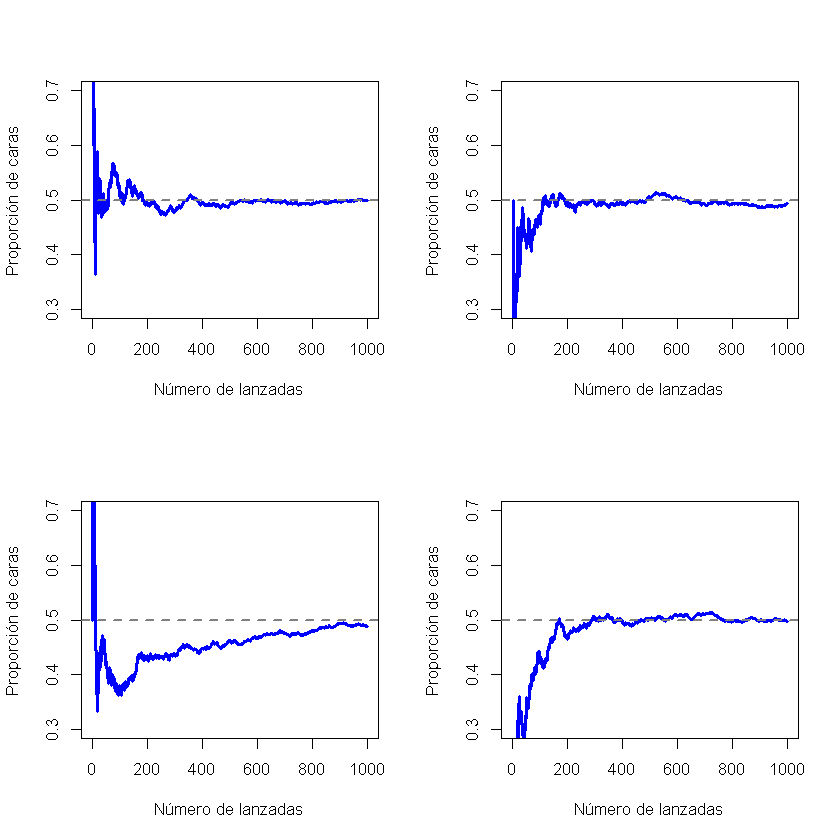

In [3]:
emphCol <- rgb(0,0,1)
emphColLight <- rgb(.5,.5,1)
emphGrey <- grey(.5)
eps <- TRUE
colour <- TRUE
	width <- 12
	height <- 8
	def.par <- par(no.readonly = TRUE)
	layout( matrix(1:4,2,2) )
	for( i in 1:4 ) {
		
		X <- as.numeric( runif(1000) > .5 )
		X <- cumsum(X) / (1:1000)
		plot( 1:1000, X, type="l", ylim=c(.3,.7), col=ifelse(colour,emphCol,emphGrey),
			xlab = "Número de lanzadas", ylab = "Proporción de caras", lwd=3
			) 
		abline(h=.5,lty=2,col=emphGrey,lwd=2)
		
	}
	par(def.par)#- reset to default